# Data Analysis and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from dateutil import parser
from pandas import Series
from math import ceil

In [2]:
df = pd.read_csv('../Resources/finalClean_games.csv', encoding="utf-8")
vg_df = df
vg_df = vg_df.copy()
vg_df.head()

,Game Name,Franchise,Platform,Release Year,Years Since,First Release Year,Main Genre,Tier by Score,Critics,Critic_Score,Users,User Score,Developer,Global Sales,Other Info
0,#IDARB,#IDARB,Xbox,2015,0,2015,Action,Tier 3,31,77,88,6.9,OtherOceanInteractive,0.09,"Action,General"
1,007: Quantum of Solace,007: Quantum of Solace,PlayStation,2008,0,2008,Action,Tier 4,42,65,59,6.6,Treyarch,1.14,"Action,General,Shooter,Shooter,First-Person,Mo..."
2,007: Quantum of Solace,007: Quantum of Solace,PC,2008,0,2008,Action,Tier 3,18,70,64,6.1,"Treyarch,Beenox",0.03,"Action,General,Shooter,Shooter,First-Person,Mo..."
3,0RBITALIS,0RBITALIS,PC,2015,0,2015,General,Tier 3,9,73,4,7.3,AlanZucconi,NaN,"Miscellaneous,Puzzle,Action"
4,10 Second Ninja,10 Second Ninja,PC,2014,0,2014,Action,Tier 3,13,72,16,7.1,GameDesignDan,0.02,"Action,Platformer,2D"


In [3]:
vg_df.dtypes

Game Name              object
Franchise              object
Platform               object
Release Year            int64
Years Since             int64
First Release Year      int64
Main Genre             object
Tier by Score          object
Critics                 int64
Critic_Score            int64
Users                   int64
User Score            float64
Developer              object
Global Sales          float64
Other Info             object
dtype: object

In [4]:
vg_df.dropna()

,Game Name,Franchise,Platform,Release Year,Years Since,First Release Year,Main Genre,Tier by Score,Critics,Critic_Score,Users,User Score,Developer,Global Sales,Other Info
0,#IDARB,#IDARB,Xbox,2015,0,2015,Action,Tier 3,31,77,88,6.9,OtherOceanInteractive,0.09,"Action,General"
1,007: Quantum of Solace,007: Quantum of Solace,PlayStation,2008,0,2008,Action,Tier 4,42,65,59,6.6,Treyarch,1.14,"Action,General,Shooter,Shooter,First-Person,Mo..."
2,007: Quantum of Solace,007: Quantum of Solace,PC,2008,0,2008,Action,Tier 3,18,70,64,6.1,"Treyarch,Beenox",0.03,"Action,General,Shooter,Shooter,First-Person,Mo..."
4,10 Second Ninja,10 Second Ninja,PC,2014,0,2014,Action,Tier 3,13,72,16,7.1,GameDesignDan,0.02,"Action,Platformer,2D"
5,10 Second Ninja X,10 Second Ninja,Xbox,2016,2,2014,Action,Tier 2,10,82,8,4.5,GameDesignDan,0.11,"Action,Platformer,2D"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,You Don't Know Jack,You Don't Know Jack,PlayStation,2011,11,2000,General,Tier 2,11,82,17,8.2,"Jellyvision,IronGalaxyStudios",0.18,"Miscellaneous,Trivia / Game Show,Trivia / Game..."
5477,Zoo Tycoon 2,Zoo Tycoon,PC,2004,3,2001,Strategy,Tier 3,34,72,63,7.9,BlueFangGames,0.06,"Strategy,Tycoon,Management,Tycoon,Business / T..."
5486,echochrome,echochrome,PlayStation,2008,0,2008,General,Tier 2,32,81,17,7.3,"SCE/WWS,SCEJapanStudio",0.03,"Miscellaneous,Puzzle,Action,Puzzle,General,Gen..."
5487,echochrome ii,echochrome,PlayStation,2010,2,2008,General,Tier 3,28,79,11,6.5,SCEJapanStudio,0.13,"Miscellaneous,Puzzle,Action,Puzzle,General,Puz..."


# Data Cleaning

In [5]:
# # Convert string date to datetime format
# vg_df['year_of_release'] = pd.to_datetime(vg_df['release-date'], format='%d-%b-%y')
# print(vg_df)

In [7]:
len(vg_df['Main Genre'])

5497

In [ ]:
# splitting genre column
genre = vg_df['Main Genre'].str.split(',', n=1, expand=True)
genre.head(15)

In [ ]:
genre.columns = ["Main Genre", "other"]
genre.head()

In [ ]:
vg_df = vg_df.join(genre, lsuffix='genre', rsuffix= 'primary_genre')

In [ ]:
cols = list(vg_df.columns.values)
cols

In [ ]:
vg_df.drop(['other'], axis =1)

In [ ]:
vg_df = vg_df[['title','platform','release-date', 'score', 'user_score', 'developer', 'genre', 'primary_genre', 'critics', 'users', 'franchise', 'global_sales']]

vg_df.head()

In [ ]:
vg_df.columns

In [ ]:
vg_df.get('primary_genre')

# Top Values in Dataset

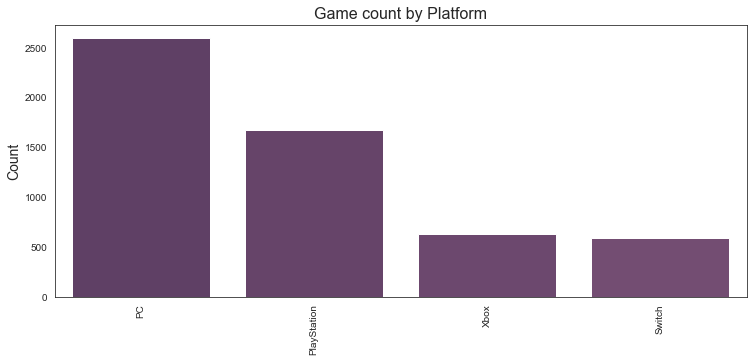

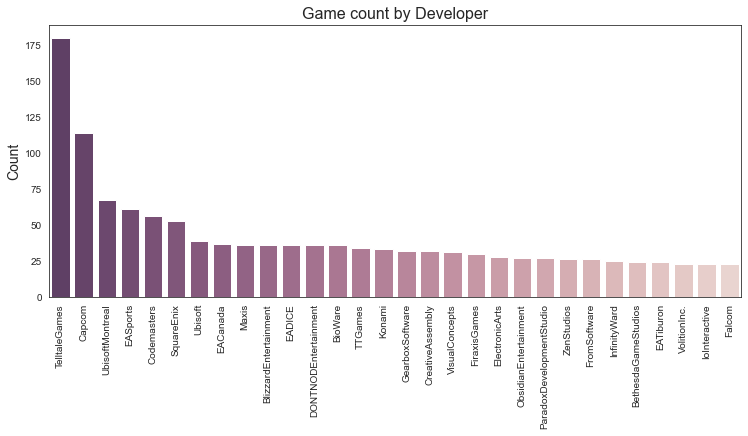

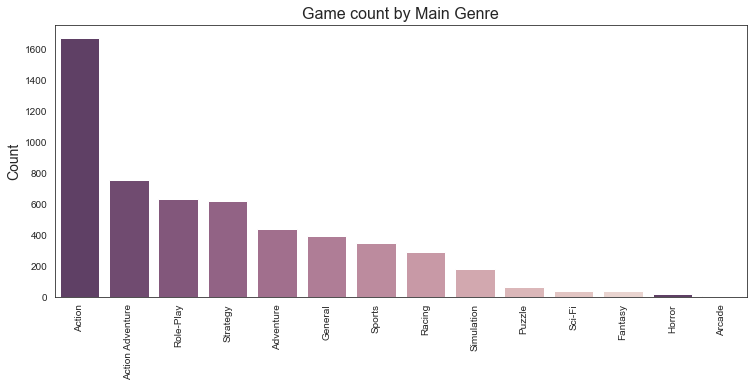

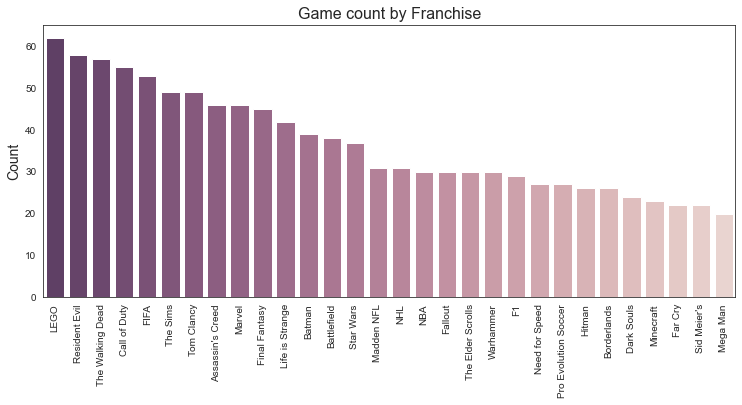

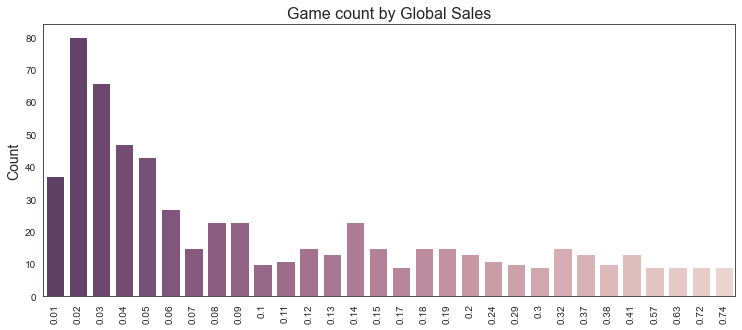

In [10]:
cols = ['Platform', 'Developer', 'Main Genre', 'Franchise', 'Global Sales'] 

for col in cols:
    chart = vg_df[['Game Name', col]].groupby([col]).count().sort_values('Game Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Game Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Main Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

# Sales vs Critic Scores

In [11]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [13]:
score_df = vg_df.dropna(subset=['Critic_Score']).reset_index(drop=True)
score_df['score_group'] = score_df['Critic_Score'].apply(lambda x: score_group(x))

In [14]:
score_df.head()

,Game Name,Franchise,Platform,Release Year,Years Since,First Release Year,Main Genre,Tier by Score,Critics,Critic_Score,Users,User Score,Developer,Global Sales,Other Info,score_group
0,#IDARB,#IDARB,Xbox,2015,0,2015,Action,Tier 3,31,77,88,6.9,OtherOceanInteractive,0.09,"Action,General",70-79
1,007: Quantum of Solace,007: Quantum of Solace,PlayStation,2008,0,2008,Action,Tier 4,42,65,59,6.6,Treyarch,1.14,"Action,General,Shooter,Shooter,First-Person,Mo...",60-69
2,007: Quantum of Solace,007: Quantum of Solace,PC,2008,0,2008,Action,Tier 3,18,70,64,6.1,"Treyarch,Beenox",0.03,"Action,General,Shooter,Shooter,First-Person,Mo...",70-79
3,0RBITALIS,0RBITALIS,PC,2015,0,2015,General,Tier 3,9,73,4,7.3,AlanZucconi,NaN,"Miscellaneous,Puzzle,Action",70-79
4,10 Second Ninja,10 Second Ninja,PC,2014,0,2014,Action,Tier 3,13,72,16,7.1,GameDesignDan,0.02,"Action,Platformer,2D",70-79


In [20]:
franchise = pd.get_dummies(vg_df['Franchise'])

In [23]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Franchise':
        return 13.4
    elif x == 'Main Genre':
        return 13.6

def height(x):
    if x == 'Main Genre':
        return 8
    else:
        return 9

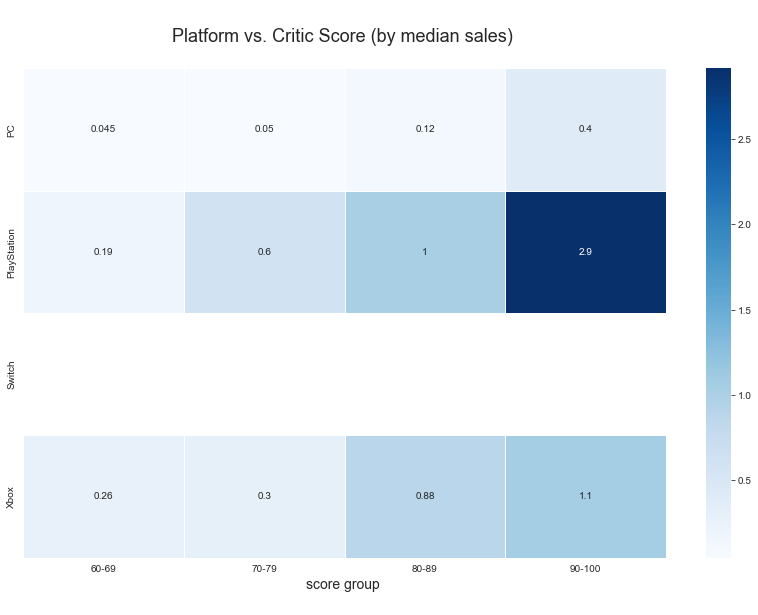

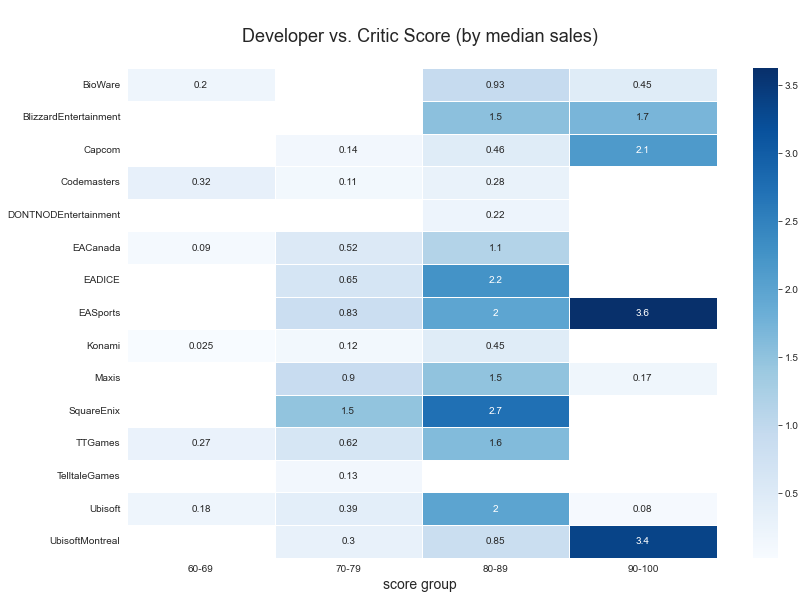

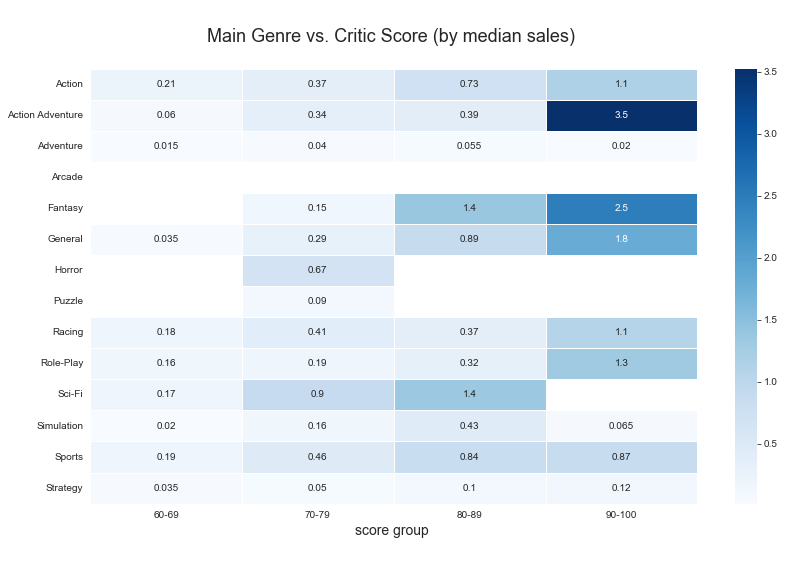

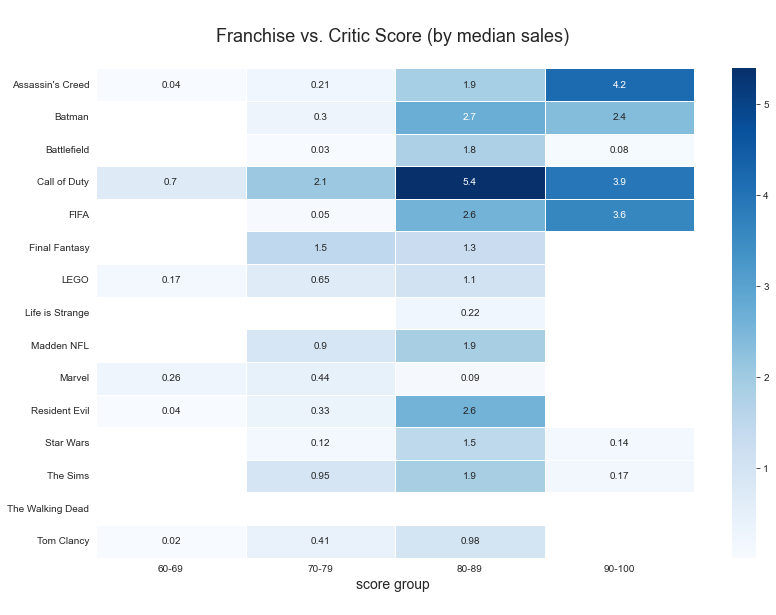

In [37]:
cols = ['Platform', 'Developer', 'Main Genre', 'Franchise']
for col in cols:
    pack = []
    top = score_df[['Game Name', col]].groupby([col]).count().sort_values('Game Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    score_df[col] = score_df[col].apply(lambda x: in_top(x))
    score_df_platform = score_df[[col, 'score_group', 'Global Sales']].groupby([col, 'score_group']).median().reset_index().pivot(col, "score_group", "Global Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(score_df_platform, cmap="Blues", annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. Critic Score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('score group \n', fontsize=14)
    pack = []

# Dataset Correlations

In [26]:
cols = ['Platform', 'Main Genre', 'Developer', 'Critic_Score', 'User Score']
for col in cols:
    uniques = vg_df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

In [32]:
df1 = pd.get_dummies(vg_df[['Platform','Main Genre','Critic_Score', 'Global Sales', 'Release Year']])
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

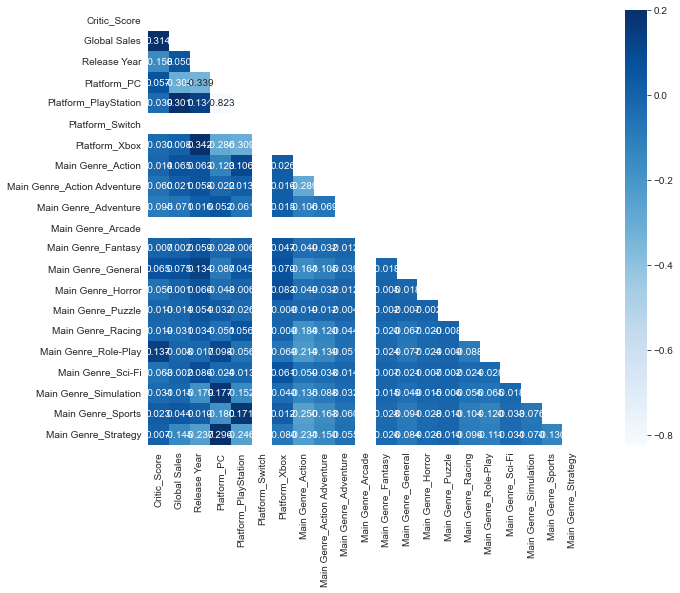

In [33]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap="Blues")

[(0.0, 4.0), (50.0, 95.0)]

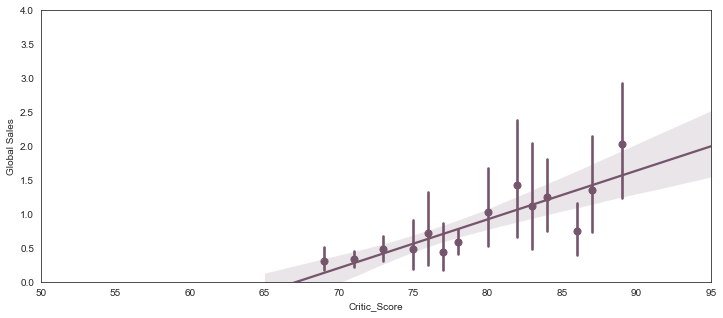

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global Sales", data=df1.loc[df1['Release Year'] >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

# Defining Hits

# Prediction Model

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
# from sklearn import svm

In [ ]:
# # Generate features
# df2.head()

In [ ]:
# from pandas import get_dummies
# df_copy = pd.get_dummies(df2)
# df_copy.head()

In [ ]:
# df3 = df_copy
# y = df3['Hit'].values
# df3 = df3.drop(['Hit'],axis=1)
# X = df3.values

In [ ]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

In [ ]:
# radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
# y_val_1 = radm.predict_proba(Xtest)
# print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
#                                    == ytest)/len(ytest))

In [ ]:
# log_reg = LogisticRegression().fit(Xtrain, ytrain)
# y_val_2 = log_reg.predict_proba(Xtest)
# print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
#                                    == ytest)/len(ytest))

In [ ]:
# all_predictions = log_reg.predict(Xtest)
# print(classification_report(ytest, all_predictions))

In [ ]:
# fig, ax = plt.subplots(figsize=(3.5,2.5))
# sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
# sns.plt.title('Training Set Confusion Matrix')

In [ ]:
# indices = np.argsort(radm.feature_importances_)[::-1]

# # Print the feature ranking
# print('Feature ranking (top 10):')

# for f in range(10):
#     print('%d. feature %d %s (%f)' % (f+1 , indices[f], df3.columns[indices[f]],
#                                       radm.feature_importances_[indices[f]]))

# Top Hits

In [ ]:
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [ ]:
df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [ ]:
pred = log_reg.predict_proba(X)

In [ ]:
dfb = dfb[dfb['Global_Sales'] < 1]

In [ ]:
dfb['Hit_Probability'] = pred[:,1]

In [ ]:
dfb = dfb[dfb['Year_of_Release'] == 2016]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb = dfb[['Name', 'Platform', 'Hit_Probability']]

In [ ]:
dfb[:10].reset_index(drop=True)

In [ ]:
dfb[:-11:-1].reset_index(drop=True)